# Section Order:
(1) Import Packages & Data

(2) Getting acquanted with the data

# Import Packages & Data

In [1]:
# Data Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt # side-stepping mpl backend
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

import matplotlib.gridspec as gridspec # subplots
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

# Preprocessing & Cross Validation
from sklearn import preprocessing as pp
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.linear_model import Lasso

# Regression / Modeling
import statsmodels.api as sm

# Custom functions
from project_functions import label_polynomial_features
from project_functions import model_to_dictionary
from project_functions import results_summary_to_dataframe





In [2]:
df_raw = pd.read_csv('../Resources/Data/Raw/mypersonality_final.csv')

# Getting acquanted with the data

In [3]:
df_raw.head(3).T

,0,1,2
#AUTHID,b7b7764cfa1c523e4e93ab2a79a946c4,b7b7764cfa1c523e4e93ab2a79a946c4,b7b7764cfa1c523e4e93ab2a79a946c4
STATUS,likes the sound of thunder.,is so sleepy it's not even funny that's she ca...,is sore and wants the knot of muscles at the b...
sEXT,2.65,2.65,2.65
sNEU,3,3,3
sAGR,3.15,3.15,3.15
sCON,3.25,3.25,3.25
sOPN,4.4,4.4,4.4
cEXT,n,n,n
cNEU,y,y,y
cAGR,n,n,n


In [4]:
df_raw.shape

(9917, 20)

In [5]:
df_grouped = df_raw.groupby(by = "#AUTHID", as_index = False).first()

In [6]:
df_grouped[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN',"NETWORKSIZE","BETWEENNESS"]].describe()

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,2.500000e+02
mean,3.292120,2.627240,3.600320,3.522920,4.07856,408.012000,1.289368e+05
std,0.861368,0.776835,0.670758,0.740211,0.57506,316.636458,2.048076e+05
min,1.330000,1.250000,1.650000,1.450000,2.25000,24.000000,1.857100e+02
25%,2.662500,2.000000,3.150000,3.000000,3.75000,175.000000,1.406235e+04
50%,3.300000,2.590000,3.660000,3.500000,4.15000,315.000000,4.663610e+04
75%,4.000000,3.150000,4.100000,4.050000,4.50000,556.500000,1.454830e+05
max,5.000000,4.750000,5.000000,5.000000,5.00000,1596.000000,1.251780e+06


In [7]:
df_grouped_reduced = df_grouped[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN',"NETWORKSIZE","BETWEENNESS"]].sort_values(by= "BETWEENNESS")


In [8]:
df_grouped.quantile([0.1,0.25,0.5,0.75,0.9])

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0.10,2.1450,1.60,2.795,2.60,3.45,90.8,3750.321,86.3300,0.01,3889.50,0.47,0.030
0.25,2.6625,2.00,3.150,3.00,3.75,175.0,14062.350,93.2600,0.01,14576.25,0.49,0.060
0.50,3.3000,2.59,3.660,3.50,4.15,315.0,46636.100,96.0200,0.02,48358.00,0.49,0.110
0.75,4.0000,3.15,4.100,4.05,4.50,556.5,145483.000,97.8075,0.04,152115.75,0.50,0.180
0.90,4.5000,3.75,4.500,4.50,4.75,846.0,349760.900,98.5910,0.07,354163.00,0.50,0.311


In [9]:
df_grouped["BETWEENNESS"].quantile(0.1)

3750.3209999999999

In [10]:
df_grouped["BETWEENNESS"].quantile(0.9)

349760.90000000002

In [11]:
# Give me all the people who are in the bottom 10% in Betweenness Centrality
low_users_df = df_grouped_reduced[df_grouped_reduced["BETWEENNESS"]<df_grouped["BETWEENNESS"].quantile(0.1)]
average_low_user = df_grouped_reduced[df_grouped_reduced["BETWEENNESS"]<df_grouped["BETWEENNESS"].quantile(0.1)].mean()

# Fairly high openness... intelligence leads to a decrease in working in grous?

In [12]:
# Give me all the people who are in the top 10% in Betweenness Centrality
high_users_df = df_grouped_reduced[df_grouped_reduced["BETWEENNESS"]>df_grouped["BETWEENNESS"].quantile(0.9)]
average_high_user = df_grouped_reduced[df_grouped_reduced["BETWEENNESS"]<df_grouped["BETWEENNESS"].quantile(0.9)].mean()

# Fairly high openness... intelligence leads to a decrease in working in grous?

In [13]:
print "Low User:"
print average_low_user
print
print "High User:"
print average_high_user
print


Low User:
sEXT              2.8784
sNEU              2.6932
sAGR              3.6492
sCON              3.1572
sOPN              4.2032
NETWORKSIZE      62.8000
BETWEENNESS    1841.1144
dtype: float64

High User:
sEXT               3.213689
sNEU               2.653556
sAGR               3.572133
sCON               3.494489
sOPN               4.076400
NETWORKSIZE      328.315556
BETWEENNESS    71920.206578
dtype: float64



In [14]:
high_users_df

,sEXT,sNEU,sAGR,sCON,sOPN,NETWORKSIZE,BETWEENNESS
77,4.50,4.00,4.00,2.00,2.25,845.0,350408.0
165,4.00,3.25,3.50,4.25,5.00,899.0,396675.0
12,4.25,1.75,4.75,5.00,4.00,900.0,397632.0
111,4.20,2.33,3.17,3.00,4.17,907.0,404895.0
75,4.15,3.10,3.20,3.60,3.80,950.0,438219.0
134,4.00,1.95,4.25,3.55,3.45,959.0,441049.0
162,4.25,1.75,5.00,4.25,3.50,955.0,441841.0
37,4.10,1.78,3.30,4.30,4.70,947.0,442522.0
224,4.50,1.75,4.50,4.75,4.75,962.0,446252.0
218,4.50,2.25,3.50,3.25,3.75,965.0,453685.0


## Observation: High users clearly "all" are oriented toward greater extroversion. 
Low users are more spread out

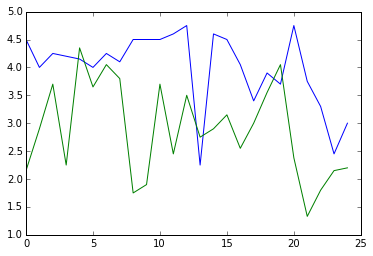

In [15]:
plt.plot(high_users_df["sEXT"])
plt.plot(low_users_df["sEXT"])

## Observation: High Users show greater diversity of values in consciousness. Whereas low users tend to be centered in the middle.

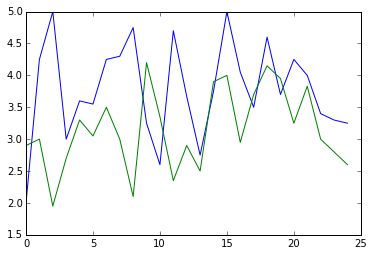

In [16]:
plt.plot(high_users_df["sCON"])
plt.plot(low_users_df["sCON"])

# High users tend to have low values of neuroticism . Low users are more spread out.

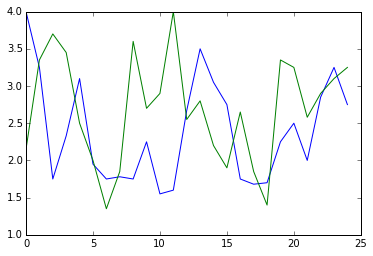

In [17]:
plt.plot(high_users_df["sNEU"])
plt.plot(low_users_df["sNEU"])

## About the same in both groups..

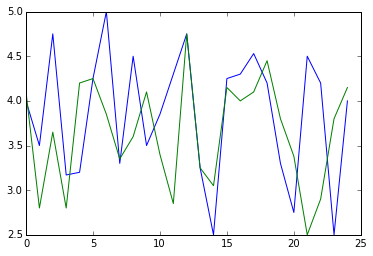

In [18]:
plt.plot(high_users_df["sAGR"])
plt.plot(low_users_df["sAGR"])

# High users tend to have/ be focused on the extreme positive. 

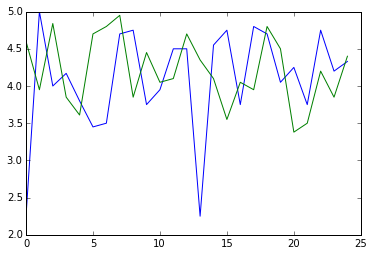

In [19]:
plt.plot(high_users_df["sOPN"])
plt.plot(low_users_df["sOPN"])

# Extracting some time series

In [20]:
x_extroversion = df_grouped["sEXT"]
x_neuroticism = df_grouped["sNEU"]
x_agreeableness = df_grouped["sAGR"]
x_conscientiousness = df_grouped["sCON"]
x_openness = df_grouped["sOPN"]

# y_betweenness = df_grouped["BETWEENNESS"] / df_grouped["NETWORKSIZE"]   # Temporary
y_betweenness = df_grouped["BETWEENNESS"]


y_nbetweenness = df_grouped["NBETWEENNESS"]

network_size = df_grouped["NETWORKSIZE"]

variable_list = [x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness]

# List of Basic Models

In [21]:
X_big5 = pd.DataFrame([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness]).T
X_network = pd.DataFrame([network_size]).T
X_big5_and_network = pd.DataFrame([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness,network_size]).T
X_big5_and_network_betweenness = pd.DataFrame([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness,network_size,y_betweenness]).T

# Creating some useful scatterplots

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



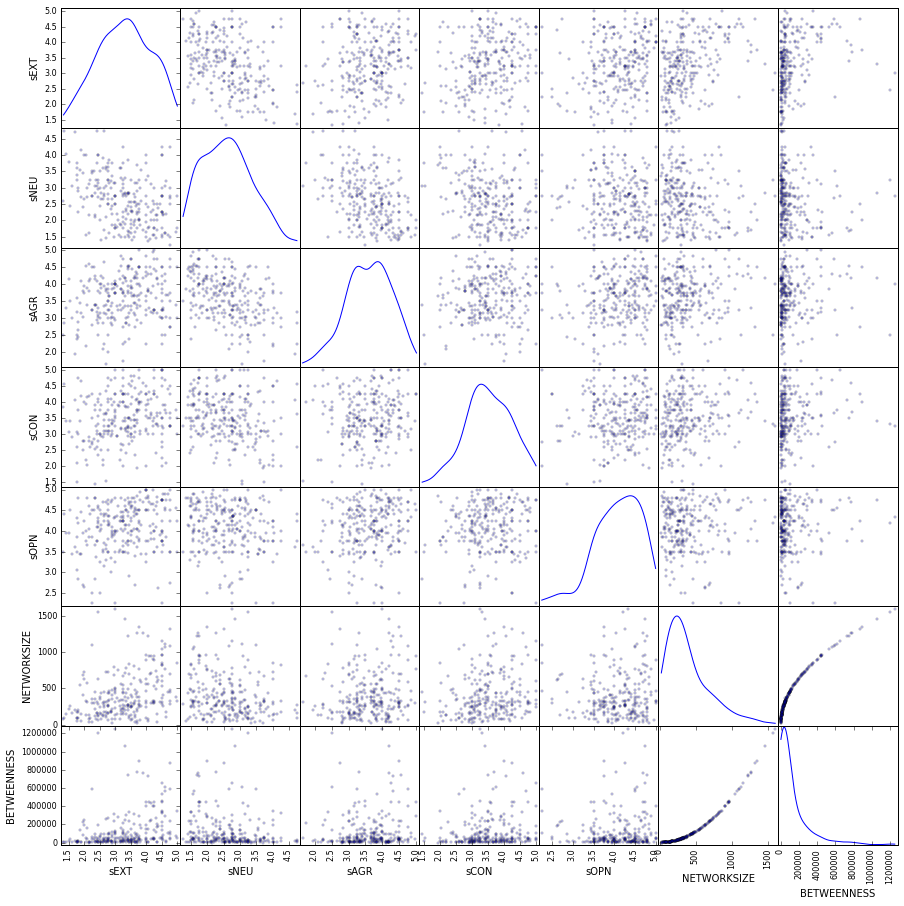

In [22]:
scatter_matrix(X_big5_and_network_betweenness, alpha=0.2, figsize=(15,15), diagonal='kde')
plt.savefig("../Visualizations/scatter_plot_matrix_big5_networks.png")
plt.show()

## Create a function which does a "polynomial expansion" for all the individual features

# Generate expanded models

In [23]:
X_big5.head()

,sEXT,sNEU,sAGR,sCON,sOPN
0,1.90,4.15,3.15,4.65,3.45
1,2.05,4.00,2.20,2.20,3.75
2,3.84,3.55,2.85,4.32,3.45
3,3.20,3.60,3.85,4.35,4.80
4,2.85,2.35,3.35,4.70,3.35


# Testing out alternate solution to preprocessing code - Begining

In [24]:
X_big5_test = X_big5
X_big5_test.head()

,sEXT,sNEU,sAGR,sCON,sOPN
0,1.90,4.15,3.15,4.65,3.45
1,2.05,4.00,2.20,2.20,3.75
2,3.84,3.55,2.85,4.32,3.45
3,3.20,3.60,3.85,4.35,4.80
4,2.85,2.35,3.35,4.70,3.35


In [25]:
poly = pp.PolynomialFeatures(2,include_bias=True)
output_nparray = poly.fit_transform(X_big5_test)
powers_nparray = poly.powers_

In [26]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X_big5_test.columns,p) for p in poly.powers_]]
output_df = pd.DataFrame(output_nparray, columns = target_feature_names)

In [27]:
output_df.head()

,,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,sEXT^2,sEXT^1xsNEU^1,sEXT^1xsAGR^1,sEXT^1xsCON^1,...,sNEU^2,sNEU^1xsAGR^1,sNEU^1xsCON^1,sNEU^1xsOPN^1,sAGR^2,sAGR^1xsCON^1,sAGR^1xsOPN^1,sCON^2,sCON^1xsOPN^1,sOPN^2
0,1.0,1.90,4.15,3.15,4.65,3.45,3.6100,7.8850,5.9850,8.8350,...,17.2225,13.0725,19.2975,14.3175,9.9225,14.6475,10.8675,21.6225,16.0425,11.9025
1,1.0,2.05,4.00,2.20,2.20,3.75,4.2025,8.2000,4.5100,4.5100,...,16.0000,8.8000,8.8000,15.0000,4.8400,4.8400,8.2500,4.8400,8.2500,14.0625
2,1.0,3.84,3.55,2.85,4.32,3.45,14.7456,13.6320,10.9440,16.5888,...,12.6025,10.1175,15.3360,12.2475,8.1225,12.3120,9.8325,18.6624,14.9040,11.9025
3,1.0,3.20,3.60,3.85,4.35,4.80,10.2400,11.5200,12.3200,13.9200,...,12.9600,13.8600,15.6600,17.2800,14.8225,16.7475,18.4800,18.9225,20.8800,23.0400
4,1.0,2.85,2.35,3.35,4.70,3.35,8.1225,6.6975,9.5475,13.3950,...,5.5225,7.8725,11.0450,7.8725,11.2225,15.7450,11.2225,22.0900,15.7450,11.2225


## It works but doesn't add in the constant term. Regardless, a lot faster it seems than how i did it. WIll need to digest further later.

# Testing out alternate solution to preprocessing code - End

In [28]:
# THis has to come first otherwise the constant term will get duplicated
X_big5_polyexpanded = label_polynomial_features(X_big5,2,bias = True)
X_network_polyexpanded =  label_polynomial_features(X_network,2,bias = True)
X_big5_and_network_polyexpanded =  label_polynomial_features(X_big5_and_network,2,bias = True)

# The reason I'm recreating these with polynomial expansion is just so it will have consistent feature names with the others
X_big5= label_polynomial_features(X_big5,1,bias = True)
X_network=  label_polynomial_features(X_network,1,bias = True)
X_big5_and_network =  label_polynomial_features(X_big5_and_network,1,bias = True)


#target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X_big5`.columns,p) for p in poly.powers_]]
#output_df = pd.DataFrame(output_nparray, columns = target_feature_names)


In [29]:
list_of_model_names = [
                        'X_big5',
                        'X_big5_polyexpanded',
                        'X_network',
                        'X_network_polyexpanded',
                        'X_big5_and_network',
                        'X_big5_and_network_polyexpanded']

In [30]:
X_big5_polyexpanded.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,sEXT^2,sEXT^1 x sNEU^1,sEXT^1 x sAGR^1,sEXT^1 x sCON^1,...,sNEU^2,sNEU^1 x sAGR^1,sNEU^1 x sCON^1,sNEU^1 x sOPN^1,sAGR^2,sAGR^1 x sCON^1,sAGR^1 x sOPN^1,sCON^2,sCON^1 x sOPN^1,sOPN^2
0,1.0,1.90,4.15,3.15,4.65,3.45,3.6100,7.8850,5.9850,8.8350,...,17.2225,13.0725,19.2975,14.3175,9.9225,14.6475,10.8675,21.6225,16.0425,11.9025
1,1.0,2.05,4.00,2.20,2.20,3.75,4.2025,8.2000,4.5100,4.5100,...,16.0000,8.8000,8.8000,15.0000,4.8400,4.8400,8.2500,4.8400,8.2500,14.0625
2,1.0,3.84,3.55,2.85,4.32,3.45,14.7456,13.6320,10.9440,16.5888,...,12.6025,10.1175,15.3360,12.2475,8.1225,12.3120,9.8325,18.6624,14.9040,11.9025
3,1.0,3.20,3.60,3.85,4.35,4.80,10.2400,11.5200,12.3200,13.9200,...,12.9600,13.8600,15.6600,17.2800,14.8225,16.7475,18.4800,18.9225,20.8800,23.0400
4,1.0,2.85,2.35,3.35,4.70,3.35,8.1225,6.6975,9.5475,13.3950,...,5.5225,7.8725,11.0450,7.8725,11.2225,15.7450,11.2225,22.0900,15.7450,11.2225


In [31]:
X_big5_polyexpanded.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,sEXT^2,sEXT^1 x sNEU^1,sEXT^1 x sAGR^1,sEXT^1 x sCON^1,...,sNEU^2,sNEU^1 x sAGR^1,sNEU^1 x sCON^1,sNEU^1 x sOPN^1,sAGR^2,sAGR^1 x sCON^1,sAGR^1 x sOPN^1,sCON^2,sCON^1 x sOPN^1,sOPN^2
0,1.0,1.90,4.15,3.15,4.65,3.45,3.6100,7.8850,5.9850,8.8350,...,17.2225,13.0725,19.2975,14.3175,9.9225,14.6475,10.8675,21.6225,16.0425,11.9025
1,1.0,2.05,4.00,2.20,2.20,3.75,4.2025,8.2000,4.5100,4.5100,...,16.0000,8.8000,8.8000,15.0000,4.8400,4.8400,8.2500,4.8400,8.2500,14.0625
2,1.0,3.84,3.55,2.85,4.32,3.45,14.7456,13.6320,10.9440,16.5888,...,12.6025,10.1175,15.3360,12.2475,8.1225,12.3120,9.8325,18.6624,14.9040,11.9025
3,1.0,3.20,3.60,3.85,4.35,4.80,10.2400,11.5200,12.3200,13.9200,...,12.9600,13.8600,15.6600,17.2800,14.8225,16.7475,18.4800,18.9225,20.8800,23.0400
4,1.0,2.85,2.35,3.35,4.70,3.35,8.1225,6.6975,9.5475,13.3950,...,5.5225,7.8725,11.0450,7.8725,11.2225,15.7450,11.2225,22.0900,15.7450,11.2225


In [32]:
# This is a dictionary of the models. The keys are the names of the models and the values are the dataframe / 
#X matricies appropriate to them

dictionary_of_models_x_matricies = {"X_big5":X_big5,
                        "X_big5_polyexpanded":X_big5_polyexpanded,
                        "X_network":X_network,
                        "X_network_polyexpanded":X_network_polyexpanded,
                        "X_big5_and_network":X_big5_and_network,
                        "X_big5_and_network_polyexpanded":X_big5_and_network_polyexpanded,
                       }

# Clean Data as Necesesary

# Summary Statistics & Descriptive Visualizations (Pandas and Matplotlib, etc)

### Plot network size

### Printing the covaraiance matrix

In [33]:
X_big5_and_network.corr()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1
Constant Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sEXT^1,NaN,1.000000,-0.377248,0.205420,0.200926,0.203027,0.362139
sNEU^1,NaN,-0.377248,1.000000,-0.420796,-0.234329,-0.135144,-0.180202
sAGR^1,NaN,0.205420,-0.420796,1.000000,0.099657,0.179662,0.111331
sCON^1,NaN,0.200926,-0.234329,0.099657,1.000000,0.082613,0.156496
sOPN^1,NaN,0.203027,-0.135144,0.179662,0.082613,1.000000,0.021653
NETWORKSIZE^1,NaN,0.362139,-0.180202,0.111331,0.156496,0.021653,1.000000


In [34]:
np.cov(np.vstack([x_extroversion,x_neuroticism,x_agreeableness,x_conscientiousness,x_openness,network_size]))

array([[  7.41954925e-01,  -2.52431876e-01,   1.18685263e-01,
          1.28109447e-01,   1.00566920e-01,   9.87700949e+01],
       [ -2.52431876e-01,   6.03472271e-01,  -2.19263370e-01,
         -1.34744519e-01,  -6.03722635e-02,  -4.43251475e+01],
       [  1.18685263e-01,  -2.19263370e-01,   4.49916363e-01,
          4.94801863e-02,   6.93004627e-02,   2.36452572e+01],
       [  1.28109447e-01,  -1.34744519e-01,   4.94801863e-02,
          5.47912323e-01,   3.51656675e-02,   3.66792821e+01],
       [  1.00566920e-01,  -6.03722635e-02,   6.93004627e-02,
          3.51656675e-02,   3.30693500e-01,   3.94266795e+00],
       [  9.87700949e+01,  -4.43251475e+01,   2.36452572e+01,
          3.66792821e+01,   3.94266795e+00,   1.00258646e+05]])

### Perform Scatter plots (y vs. Xi) for each of the X's -- this suggest relationship

### Check features for normality by using a density plot - plot normal on top of it. If it's not normal, then do some transformations on the features until they get to be normal

# Testing (Regression)

### Step 1a: (via intuition) Generate different models and provide explanations of why (avoid products, okay for squares and logs)

### Step 1b: Algorithmly - go throuhg all the options and create them.

### Step 2: Separate Data into 3 groupings: training, cv, and 
- Create seed

In [35]:
list_of_all_possible_features = list(dictionary_of_models_x_matricies["X_big5_and_network_polyexpanded"].columns)

In [36]:
.7*250

175.0

In [37]:
dictionary_of_model_general_performance_metrics = {}
for model_name,model_matrix in dictionary_of_models_x_matricies.items():
    print model_name
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(model_matrix, y_betweenness, test_size=0.3, random_state=0)
    model = sm.OLS(y_train,X_train)
    dictionary_of_model_general_performance_metrics[model_name] = model_to_dictionary(model,X_test,y_test)

X_network_polyexpanded
X_big5
X_big5_polyexpanded
X_network
X_big5_and_network
X_big5_and_network_polyexpanded


In [38]:
dictionary_of_model_general_performance_metrics["X_big5"]['Z_Test RSqAdj']

-0.06245036409120952

### Step 3: Using the Training set, determine the best coefficients for each model... (Fitting a model -- sm.fit()))

In [39]:
model_names = []
number_regressors = []
features_names = []
train_rsq_adj = []
train_ssr = []
test_rsq_adj = []
test_sse = []
z_test_rsq_adj = []

z_test_sst = []
#model_dict["test_sst"] = test_sst


for model in dictionary_of_model_general_performance_metrics.keys():
    model_names.append(model)
    number_regressors.append(dictionary_of_model_general_performance_metrics[model]["Number Regressors"])
    
    string_of_features = "; ".join(dictionary_of_model_general_performance_metrics[model]["Feature Names"])  # This converts a list of feature names into a single string containing all the names
    features_names.append(string_of_features)
    train_rsq_adj.append(dictionary_of_model_general_performance_metrics[model]["TRAIN RSqAdj"])
    train_ssr.append(dictionary_of_model_general_performance_metrics[model]["TRAIN SSR"])
    test_rsq_adj.append(dictionary_of_model_general_performance_metrics[model]["Test RSqAdj"])
    test_sse.append(dictionary_of_model_general_performance_metrics[model]["Test SSE"])
    z_test_rsq_adj.append(dictionary_of_model_general_performance_metrics[model]["Z_Test RSqAdj"])   #Added for troubleshooting purposes
    z_test_sst.append(dictionary_of_model_general_performance_metrics[model]["z_test_sst"])    #Added for troubleshooting purposes

names = ["model_names","number_regressors","feature_names","train_rsq_adj","train_ssr","test_rsq_adj","z_test_rsq_adj","test_sse","z_test_sst"]
values = [model_names,number_regressors,features_names,train_rsq_adj,train_ssr,test_rsq_adj,z_test_rsq_adj,test_sse,z_test_sst]

blah = pd.DataFrame(dict(zip(names,values)), index = None)
blah = blah[["model_names","number_regressors","feature_names","train_rsq_adj","train_ssr","test_rsq_adj","z_test_rsq_adj","test_sse","z_test_sst"]]   #Fixing the order of the columns
blah

,model_names,number_regressors,feature_names,train_rsq_adj,train_ssr,test_rsq_adj,z_test_rsq_adj,test_sse,z_test_sst
0,X_network_polyexpanded,2.0,Constant Term; NETWORKSIZE^1; NETWORKSIZE^2,0.999765,1.591077e+09,0.999861,0.999861,4.714616e+08,3.541399e+12
1,X_big5,5.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.059499,6.256550e+12,-0.062450,-0.062450,3.457488e+12,3.541399e+12
2,X_big5_polyexpanded,20.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.022310,5.926672e+12,-0.295000,-0.295000,3.284648e+12,3.541399e+12
3,X_network,1.0,Constant Term; NETWORKSIZE^1,0.885195,7.817993e+11,0.901978,0.901978,3.377538e+11,3.541399e+12
4,X_big5_and_network,6.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.886461,7.508350e+11,0.905156,0.905156,3.041095e+11,3.541399e+12
5,X_big5_and_network_polyexpanded,27.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.999772,1.316989e+09,0.999659,0.999659,7.502323e+08,3.541399e+12


# ALthough my Z_test_rsq_adj doesn't have negative values and in general the values are smaller than jeremy's...there is still a discrepency, there is likely a problem here that needs to be addressed

In [40]:
dictionary_of_model_general_performance_metrics["X_big5"]

{'Estimated Coefficients': Constant Term   -270081.897832
 sEXT^1            50094.549087
 sNEU^1            -5591.777769
 sAGR^1            35332.693944
 sCON^1            21129.161948
 sOPN^1             9011.618835
 dtype: float64,
 'Feature Names': ['Constant Term',
  'sEXT^1',
  'sNEU^1',
  'sAGR^1',
  'sCON^1',
  'sOPN^1'],
 'Number Regressors': 5.0,
 'Number Residuals': 169.0,
 'TRAIN AIC': 4761.1046865540056,
 'TRAIN BIC': 4780.0934023975469,
 'TRAIN Confidence Interval':                            0             1
 Constant Term -620596.551961  80432.756297
 sEXT^1          11295.594635  88893.503539
 sNEU^1         -47578.050693  36394.495155
 sAGR^1         -13569.191998  84234.579887
 sCON^1         -17510.321634  59768.645531
 sOPN^1         -41571.610861  59594.848531,
 'TRAIN PValues': Constant Term    0.130103
 sEXT^1           0.011699
 sNEU^1           0.792938
 sAGR^1           0.155617
 sCON^1           0.281906
 sOPN^1           0.725506
 dtype: float64,
 'TRAIN RSq

In [41]:
# This thing takes the final metrics from dictionary of model performance, extracts out the Coefficients and 
# P values for each model. It packages them up into a tuple, reofrmates them into lists, and then they get converted into 
# a pandas dataframe for "easy viewing"

dictionary_of_model_coefficients = {}
dictionary_of_model_pvalues = {}

for feature in list_of_all_possible_features:
    #model_name = X_big5
    for model_name,model_performance_metrics_dict in dictionary_of_model_general_performance_metrics.items():
        #print model_name
        #print model_performance_metrics
        lookup_key = (feature,model_name)
        #print lookup_key
        #temp = dictionary_of_model_general_performance_metrics[model_name]["Feature Names"] + ["Constant Term"]
        #print temp
        if feature in dictionary_of_model_general_performance_metrics[model_name]["Feature Names"]:
            p_value_for_feature = model_performance_metrics_dict["TRAIN PValues"][feature]
            coef_for_feature = model_performance_metrics_dict["Estimated Coefficients"][feature]
        else:
            p_value_for_feature = None
            coef_for_feature = None            
        
        dictionary_of_model_coefficients[lookup_key] = coef_for_feature
        dictionary_of_model_pvalues[lookup_key] = p_value_for_feature
        

In [42]:
beta_big5 = []
pvalues_big5 = []
beta_big5_polyexpanded = []
pvalues_big5_polyexpanded = []
beta_network = []
pvalues_network = []
beta_network_polyexpanded = []
pvalues_network_polyexpanded = []
beta_big5_and_network = []
pvalues_big5_and_network = []
beta_big5_and_network_polyexpanded = []
pvalues_big5_and_network_polyexpanded     = []

In [43]:
for feature in list_of_all_possible_features:
    beta_big5.append(dictionary_of_model_coefficients[(feature,"X_big5")])
    pvalues_big5.append(dictionary_of_model_pvalues[(feature,"X_big5")])
    beta_big5_polyexpanded.append(dictionary_of_model_coefficients[(feature,"X_big5_polyexpanded")])
    pvalues_big5_polyexpanded.append(dictionary_of_model_pvalues[(feature,"X_big5_polyexpanded")])
    beta_network.append(dictionary_of_model_coefficients[(feature,"X_network")])
    pvalues_network.append(dictionary_of_model_pvalues[(feature,"X_network")])
    beta_network_polyexpanded.append(dictionary_of_model_coefficients[(feature,"X_network_polyexpanded")])
    pvalues_network_polyexpanded.append(dictionary_of_model_pvalues[(feature,"X_network_polyexpanded")])
    beta_big5_and_network.append(dictionary_of_model_coefficients[(feature,"X_big5_and_network")])
    pvalues_big5_and_network.append(dictionary_of_model_pvalues[(feature,"X_big5_and_network")])
    beta_big5_and_network_polyexpanded.append(dictionary_of_model_coefficients[(feature,"X_big5_and_network_polyexpanded")])
    pvalues_big5_and_network_polyexpanded.append(dictionary_of_model_pvalues[(feature,"X_big5_and_network_polyexpanded")])

    
twinkie = pd.DataFrame({"feature":list_of_all_possible_features,
                        "beta_big5":beta_big5,
                        "pvalues_big5":pvalues_big5,
                        "beta_big5_polyexpanded":beta_big5_polyexpanded,
                        "pvalues_big5_polyexpanded":pvalues_big5_polyexpanded,
                        "beta_network":beta_network,
                        "pvalues_network":pvalues_network,
                        "beta_network_polyexpanded":beta_network_polyexpanded,
                        "pvalues_network_polyexpanded":pvalues_network_polyexpanded,
                        "beta_big5_and_network":beta_big5_and_network,
                        "pvalues_big5_and_network":pvalues_big5_and_network,
                        "beta_big5_and_network_polyexpanded":beta_big5_and_network_polyexpanded,
                        "pvalues_big5_and_network_polyexpanded":pvalues_big5_and_network_polyexpanded})
                                                                        
twinkie2 = twinkie.set_index("feature")

In [44]:
print list(twinkie2.columns)
twinkie2.head()

['beta_big5', 'beta_big5_and_network', 'beta_big5_and_network_polyexpanded', 'beta_big5_polyexpanded', 'beta_network', 'beta_network_polyexpanded', 'pvalues_big5', 'pvalues_big5_and_network', 'pvalues_big5_and_network_polyexpanded', 'pvalues_big5_polyexpanded', 'pvalues_network', 'pvalues_network_polyexpanded']


,beta_big5,beta_big5_and_network,beta_big5_and_network_polyexpanded,beta_big5_polyexpanded,beta_network,beta_network_polyexpanded,pvalues_big5,pvalues_big5_and_network,pvalues_big5_and_network_polyexpanded,pvalues_big5_polyexpanded,pvalues_network,pvalues_network_polyexpanded
feature,,,,,,,,,,,,
Constant Term,-270081.897832,-134215.876567,11097.232361,298877.547049,-121987.218929,73.638208,0.130103,0.031311,0.659850,0.854838,3.620358e-32,0.896302
sEXT^1,50094.549087,-11564.257155,-3951.829008,170922.672511,NaN,NaN,0.011699,0.102865,0.362454,0.540269,NaN,NaN
sNEU^1,-5591.777769,419.459993,-3651.460578,310142.969177,NaN,NaN,0.792938,0.954814,0.500265,0.370455,NaN,NaN
sAGR^1,35332.693944,-4565.481156,-3997.378641,23623.909316,NaN,NaN,0.155617,0.599669,0.507549,0.950466,NaN,NaN
sCON^1,21129.161948,-3625.342899,4021.726528,-108789.223169,NaN,NaN,0.281906,0.596647,0.333854,0.683032,NaN,NaN


In [45]:
twinkie3 = twinkie2[["beta_big5","pvalues_big5","beta_network","pvalues_network","beta_big5_and_network","pvalues_big5_and_network","beta_big5","pvalues_big5","beta_network","pvalues_network","beta_big5_and_network","pvalues_big5_and_network"]]

In [46]:
twinkie3

,beta_big5,pvalues_big5,beta_network,pvalues_network,beta_big5_and_network,pvalues_big5_and_network,beta_big5,pvalues_big5,beta_network,pvalues_network,beta_big5_and_network,pvalues_big5_and_network
feature,,,,,,,,,,,,
Constant Term,-270081.897832,0.130103,-121987.218929,3.620358e-32,-134215.876567,3.131107e-02,-270081.897832,0.130103,-121987.218929,3.620358e-32,-134215.876567,3.131107e-02
sEXT^1,50094.549087,0.011699,NaN,NaN,-11564.257155,1.028649e-01,50094.549087,0.011699,NaN,NaN,-11564.257155,1.028649e-01
sNEU^1,-5591.777769,0.792938,NaN,NaN,419.459993,9.548142e-01,-5591.777769,0.792938,NaN,NaN,419.459993,9.548142e-01
sAGR^1,35332.693944,0.155617,NaN,NaN,-4565.481156,5.996693e-01,35332.693944,0.155617,NaN,NaN,-4565.481156,5.996693e-01
sCON^1,21129.161948,0.281906,NaN,NaN,-3625.342899,5.966473e-01,21129.161948,0.281906,NaN,NaN,-3625.342899,5.966473e-01
sOPN^1,9011.618835,0.725506,NaN,NaN,18213.206798,4.242708e-02,9011.618835,0.725506,NaN,NaN,18213.206798,4.242708e-02
NETWORKSIZE^1,NaN,NaN,613.907414,1.898177e-83,625.054156,2.948909e-79,NaN,NaN,613.907414,1.898177e-83,625.054156,2.948909e-79
sEXT^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sEXT^1 x sNEU^1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
blah

,model_names,number_regressors,feature_names,train_rsq_adj,train_ssr,test_rsq_adj,z_test_rsq_adj,test_sse,z_test_sst
0,X_network_polyexpanded,2.0,Constant Term; NETWORKSIZE^1; NETWORKSIZE^2,0.999765,1.591077e+09,0.999861,0.999861,4.714616e+08,3.541399e+12
1,X_big5,5.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.059499,6.256550e+12,-0.062450,-0.062450,3.457488e+12,3.541399e+12
2,X_big5_polyexpanded,20.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.022310,5.926672e+12,-0.295000,-0.295000,3.284648e+12,3.541399e+12
3,X_network,1.0,Constant Term; NETWORKSIZE^1,0.885195,7.817993e+11,0.901978,0.901978,3.377538e+11,3.541399e+12
4,X_big5_and_network,6.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.886461,7.508350e+11,0.905156,0.905156,3.041095e+11,3.541399e+12
5,X_big5_and_network_polyexpanded,27.0,Constant Term; sEXT^1; sNEU^1; sAGR^1; sCON^1;...,0.999772,1.316989e+09,0.999659,0.999659,7.502323e+08,3.541399e+12


# Clearly there's a big need to run lasso on the biggest model! -- Radj is too big and in some cases negative (??)!

In [48]:
X_big5_and_network_polyexpanded.shape

(250, 28)

In [49]:
X_big5_and_network_polyexpanded.describe()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1,sEXT^2,sEXT^1 x sNEU^1,sEXT^1 x sAGR^1,...,sAGR^2,sAGR^1 x sCON^1,sAGR^1 x sOPN^1,sAGR^1 x NETWORKSIZE^1,sCON^2,sCON^1 x sOPN^1,sCON^1 x NETWORKSIZE^1,sOPN^2,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
count,250.0,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1.0,3.292120,2.627240,3.600320,3.522920,4.07856,408.012000,11.577041,8.397767,11.970896,...,13.410421,12.732922,14.753144,1492.524440,12.956686,14.403466,1473.926200,16.964022,1668.028320,2.663314e+05
std,0.0,0.861368,0.776835,0.670758,0.740211,0.57506,316.636458,5.655345,2.819315,4.118490,...,4.737599,3.742903,3.709079,1244.298186,5.174969,3.734485,1236.936542,4.456795,1360.993161,4.164892e+05
min,1.0,1.330000,1.250000,1.650000,1.450000,2.25000,24.000000,1.768900,3.177500,3.315000,...,2.722500,2.557500,6.022500,67.200000,2.102500,4.132500,56.550000,5.062500,94.800000,5.760000e+02
25%,1.0,2.662500,2.000000,3.150000,3.000000,3.75000,175.000000,7.089375,6.523125,8.953125,...,9.922500,10.075000,12.165000,537.675000,9.000000,11.842500,575.550000,14.062500,681.950000,3.062500e+04
50%,1.0,3.300000,2.590000,3.660000,3.500000,4.15000,315.000000,10.890000,7.917500,12.000000,...,13.395700,12.225750,14.956250,1185.775000,12.250000,14.396250,1135.000000,17.222500,1231.125000,9.922500e+04
75%,1.0,4.000000,3.150000,4.100000,4.050000,4.50000,556.500000,16.000000,9.800000,14.929000,...,16.810000,15.279800,17.500000,1941.525000,16.402500,16.856250,1912.225000,20.250000,2113.612500,3.097110e+05
max,1.0,5.000000,4.750000,5.000000,5.000000,5.00000,1596.000000,25.000000,20.187500,22.562500,...,25.000000,23.750000,24.150000,6384.000000,25.000000,23.750000,5828.200000,25.000000,6935.000000,2.547216e+06


In [50]:
type(np.array(X_big5_and_network_polyexpanded))

numpy.ndarray

In [51]:
kf = KFold(n = 250, n_folds=5)

#, shuffle=True,random_state=0)
# for x in kf:
#     print x
    
lambda_range = np.arange(10990,10995,0.01)    # Ideal to start with a course grid and then make it finer. E.g. (0,1,0.05) -> (0,0.05, 0.001)
#lambda_range = np.arange(0,0.033,0.0001)    # Ideal to start with a course grid and then make it finer. E.g. (0,1,0.05) -> (0,0.05, 0.001)

error_per_lambda = []
#print lambda_range

for lambda_value in lambda_range:
    errors_per_fold_list = []
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        #print("%s %s" % (train_index.shape, test_index.shape))

        X_train, X_test = np.array(X_big5_and_network_polyexpanded)[train_index], np.array(X_big5_and_network_polyexpanded)[test_index]
        y_train, y_test = np.array(y_betweenness)[train_index], np.array(y_betweenness)[test_index]

        # After this step is where we do the fitting and etc...
        # For each fold, train on the training sets (X_train & y_train)
        model = Lasso(lambda_value)    # The number entered here is the lambda /alpha variable
        model.fit(X_train,y_train)

        # For each fold, get a cost for the test sets (X_test & y_test)
        y_hat = model.predict(X_test)      # this will generate the predictions
        errors = y_test - y_hat
        squared_errors = errors * errors
        sum_squared_errors = sum(squared_errors)
   
    #   Returns the coefficient of determination R^2 of the prediction.
    #   The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

        #r_squared = model.score(X_test,y_test)    # R_squared = 1 - (SSE/SST)
        #sse_divied_sst = 1 - r_squared

        # Store the cost in a separate cost list

        errors_per_fold_list.append(sum_squared_errors)
        # print errors_per_fold_list
        # Compute the average cost across all folds for the given lambda

    final_lambda_cost = np.mean(errors_per_fold_list)

    # Store the cost of the lambda

    error_per_lambda.append(final_lambda_cost)

In [52]:
lambda_error_df = pd.DataFrame({"Alpha/Lambda Value":lambda_range,"Mean Error per Fold": error_per_lambda}).sort(columns = "Mean Error per Fold")
print lambda_error_df.head(20)

    Alpha/Lambda Value  Mean Error per Fold
74            10990.74         4.543069e+08
75            10990.75         4.543069e+08
76            10990.76         4.543069e+08
77            10990.77         4.543069e+08
78            10990.78         4.543069e+08
79            10990.79         4.543069e+08
80            10990.80         4.543069e+08
81            10990.81         4.543069e+08
82            10990.82         4.543069e+08
83            10990.83         4.543069e+08
84            10990.84         4.543069e+08
85            10990.85         4.543069e+08
86            10990.86         4.543069e+08
87            10990.87         4.543069e+08
88            10990.88         4.543069e+08
89            10990.89         4.543069e+08
90            10990.90         4.543069e+08
91            10990.91         4.543069e+08
92            10990.92         4.543069e+08
93            10990.93         4.543069e+08


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [53]:
#best_lambda =  0.32  #nbetweenness alpha
best_lambda =  10990.74  #betweenness alpha
model_final = Lasso(best_lambda)
lasso_results = model_final.fit(X_big5_and_network_polyexpanded,y_betweenness)

# for i,j in zip(lasso_results.coef_,X_big5_and_network_polyexpanded.columns):    #loop over results
#     print ("Lasso:", i,"Coefficient",j)
    
lasso_results_df = pd.DataFrame([lasso_results.coef_,X_big5_and_network_polyexpanded.columns]).T
lasso_results_df.columns = ["Coeff. Estimate","Coeff. Name"]
lasso_results_df

,Coeff. Estimate,Coeff. Name
0,0,Constant Term
1,0,sEXT^1
2,-0,sNEU^1
3,0,sAGR^1
4,0,sCON^1
5,0,sOPN^1
6,-4.84297,NETWORKSIZE^1
7,0,sEXT^2
8,0,sEXT^1 x sNEU^1
9,0,sEXT^1 x sAGR^1


In [54]:
for x in list(lasso_results_df["Coeff. Name"]):
    print x

Constant Term
sEXT^1
sNEU^1
sAGR^1
sCON^1
sOPN^1
NETWORKSIZE^1
sEXT^2
sEXT^1 x sNEU^1
sEXT^1 x sAGR^1
sEXT^1 x sCON^1
sEXT^1 x sOPN^1
sEXT^1 x NETWORKSIZE^1
sNEU^2
sNEU^1 x sAGR^1
sNEU^1 x sCON^1
sNEU^1 x sOPN^1
sNEU^1 x NETWORKSIZE^1
sAGR^2
sAGR^1 x sCON^1
sAGR^1 x sOPN^1
sAGR^1 x NETWORKSIZE^1
sCON^2
sCON^1 x sOPN^1
sCON^1 x NETWORKSIZE^1
sOPN^2
sOPN^1 x NETWORKSIZE^1
NETWORKSIZE^2


In [55]:
lasso_significant_features = lasso_results_df[abs(lasso_results_df["Coeff. Estimate"]) > 0.00]
lasso_significant_features

,Coeff. Estimate,Coeff. Name
6,-4.84297,NETWORKSIZE^1
12,-0.103446,sEXT^1 x NETWORKSIZE^1
17,-0.105269,sNEU^1 x NETWORKSIZE^1
21,-0.897459,sAGR^1 x NETWORKSIZE^1
24,-0.859546,sCON^1 x NETWORKSIZE^1
26,0.699387,sOPN^1 x NETWORKSIZE^1
27,0.49827,NETWORKSIZE^2


# Now I'm going to re-run a regression using only the variables which Lasso said I should include...

## Develop the X matrix

In [56]:
X_lasso_distilled = X_big5_and_network_polyexpanded[list(lasso_significant_features["Coeff. Name"])]

In [57]:
X_lasso_distilled.head()

,NETWORKSIZE^1,sEXT^1 x NETWORKSIZE^1,sNEU^1 x NETWORKSIZE^1,sAGR^1 x NETWORKSIZE^1,sCON^1 x NETWORKSIZE^1,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
0,141.0,267.90,585.15,444.15,655.65,486.45,19881.0
1,134.0,274.70,536.00,294.80,294.80,502.50,17956.0
2,584.0,2242.56,2073.20,1664.40,2522.88,2014.80,341056.0
3,222.0,710.40,799.20,854.70,965.70,1065.60,49284.0
4,194.0,552.90,455.90,649.90,911.80,649.90,37636.0


In [58]:
 X_big5.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1
0,1.0,1.90,4.15,3.15,4.65,3.45
1,1.0,2.05,4.00,2.20,2.20,3.75
2,1.0,3.84,3.55,2.85,4.32,3.45
3,1.0,3.20,3.60,3.85,4.35,4.80
4,1.0,2.85,2.35,3.35,4.70,3.35


In [59]:
X_lasso_and_big5 = pd.concat([X_big5, X_lasso_distilled], axis=1, join='inner')
X_lasso_and_big5.head()

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1,sEXT^1 x NETWORKSIZE^1,sNEU^1 x NETWORKSIZE^1,sAGR^1 x NETWORKSIZE^1,sCON^1 x NETWORKSIZE^1,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
0,1.0,1.90,4.15,3.15,4.65,3.45,141.0,267.90,585.15,444.15,655.65,486.45,19881.0
1,1.0,2.05,4.00,2.20,2.20,3.75,134.0,274.70,536.00,294.80,294.80,502.50,17956.0
2,1.0,3.84,3.55,2.85,4.32,3.45,584.0,2242.56,2073.20,1664.40,2522.88,2014.80,341056.0
3,1.0,3.20,3.60,3.85,4.35,4.80,222.0,710.40,799.20,854.70,965.70,1065.60,49284.0
4,1.0,2.85,2.35,3.35,4.70,3.35,194.0,552.90,455.90,649.90,911.80,649.90,37636.0


Create function which converts model resutls into dataframe

In [60]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_network, y_betweenness, test_size=0.3, random_state=0)
model = sm.OLS(y_train,X_train)
dictionary_of_model_general_performance_metrics["X_lasso_distilled"] = model_to_dictionary(model,X_test,y_test)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:            BETWEENNESS   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1343.
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           1.90e-83
Time:                        13:29:48   Log-Likelihood:                -2192.6
No. Observations:                 175   AIC:                             4389.
Df Residuals:                     173   BIC:                             4395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Constant Term  -1.22e+05   8318.106    -14.665

In [61]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_lasso_and_big5, y_betweenness, test_size=0.3, random_state=0)
model = sm.OLS(y_train,X_train)
dictionary_of_model_general_performance_metrics["X_lasso_distilled"] = model_to_dictionary(model,X_test,y_test)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:            BETWEENNESS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.629e+04
Date:                Mon, 13 Feb 2017   Prob (F-statistic):          3.56e-292
Time:                        13:29:48   Log-Likelihood:                -1638.8
No. Observations:                 175   AIC:                             3304.
Df Residuals:                     162   BIC:                             3345.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Constant Term           1389

In [62]:
variance_covariance_matrix = results.cov_HC0
variance_covariance_matrix.shape
variance_covariance_matrix

array([[  1.06191612e+07,   8.06026105e+04,  -3.05888116e+05,
         -5.63003439e+05,  -7.23448576e+05,  -1.37683987e+06,
         -2.62196332e+04,  -4.82475165e+02,   4.06435142e+02,
          1.81594187e+03,   1.89393183e+03,   3.59456339e+03,
         -1.13962247e+00],
       [  8.06026105e+04,   1.90076469e+05,   1.32723378e+05,
         -1.20126541e+05,  -9.82900815e+04,  -6.27005219e+04,
         -5.43617499e+02,  -5.22441057e+02,  -3.51161775e+02,
          3.83006481e+02,   3.47189382e+02,   1.13000133e+02,
          1.61884544e-01],
       [ -3.05888116e+05,   1.32723378e+05,   3.03237032e+05,
         -6.58433415e+02,  -1.74121336e+05,  -7.63533476e+04,
          1.74339986e+02,  -3.22598280e+02,  -8.68578291e+02,
          6.48290087e+01,   6.58979964e+02,   8.76404292e+01,
          3.95728921e-01],
       [ -5.63003439e+05,  -1.20126541e+05,  -6.58433415e+02,
          3.55027572e+05,  -4.78931869e+04,  -1.83526078e+04,
          1.54641211e+03,   3.66786893e+02,  -2.231

## Here I evaluate my lasso_model against some test data!

In [63]:
y_hat = results.predict(X_test)
X_lasso_distilled_test_ssr = sum((y_hat - y_test)**2)

# This is Jeremy's formula
X_lasso_distilled_test_RSqAdj_jeremy = 1 - ((sum((y_test-y_hat)**2.0)/(len(X_test) - len(results.params) - 1))
            /(sum((y_test - np.mean(y_test))**2.0)/(len(X_test) - 1)))

# This is my formula from here: http://onlinestatbook.com/2/effect_size/images/adjusted_rsquared.gif
n = len(X_test)
p = len(results.params)
test_ssr =  X_lasso_distilled_test_ssr
test_sst =  sum((y_test - np.mean(y_test))**2.0)

print "test_ssr:", test_ssr
print "test_sst:", test_sst


test_rsq = 1 - (test_ssr/test_sst)
print "test_rsq:", test_rsq
test_rsq_adj = 1 - (((1 - test_rsq) * (n-1)) / (n-p-1))
X_lasso_distilled_test_RSqAdj_zhanna = test_rsq_adj
    
print "X_lasso_distilled_test_ssr:", X_lasso_distilled_test_ssr
print "X_lasso_distilled_test_RSqAdj_zhanna:", X_lasso_distilled_test_RSqAdj_zhanna
print "X_lasso_distilled_test_RSqAdj_jeremy:", X_lasso_distilled_test_RSqAdj_jeremy

test_ssr: 685312690.778
test_sst: 3.54139902002e+12
test_rsq: 0.999806485322
X_lasso_distilled_test_ssr: 685312690.778
X_lasso_distilled_test_RSqAdj_zhanna: 0.999765244489
X_lasso_distilled_test_RSqAdj_jeremy: 0.999765244489


In [64]:
# Clearly my R squared could be either really good or really bad...
# IT could be because my sample set is so small...

## Here I create a function to take the results summary table and turn it into a dataframe

In [65]:
peanuts = results_summary_to_dataframe(results)
peanuts

,coeff,pvals,conf_lower,conf_higher
Constant Term,1389.889121,7.793469e-01,-8390.132401,11169.910644
sEXT^1,-723.641758,1.837192e-01,-1793.969742,346.686226
sNEU^1,-371.573035,5.244451e-01,-1521.849269,778.703198
sAGR^1,826.170956,2.174041e-01,-491.345440,2143.687352
sCON^1,1098.956882,4.114154e-02,44.740406,2153.173359
sOPN^1,-1138.821905,1.218551e-01,-2584.861743,307.217933
NETWORKSIZE^1,-18.261081,8.725246e-02,-39.220462,2.698299
sEXT^1 x NETWORKSIZE^1,2.714042,2.010059e-02,0.431140,4.996944
sNEU^1 x NETWORKSIZE^1,1.451362,2.571321e-01,-1.068878,3.971602
sAGR^1 x NETWORKSIZE^1,-2.418555,7.661350e-02,-5.098584,0.261474


# Now if you filter for only those with a low p-value, and order by coefficient size...

Based on the results above, here are the significant coefficients:

In [66]:
peanuts[peanuts["pvals"]<0.1].sort(columns="coeff", ascending = False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,coeff,pvals,conf_lower,conf_higher
sCON^1,1098.956882,4.114154e-02,44.740406,2153.173359
sOPN^1 x NETWORKSIZE^1,4.107092,5.419605e-03,1.229994,6.984189
sEXT^1 x NETWORKSIZE^1,2.714042,2.010059e-02,0.431140,4.996944
NETWORKSIZE^2,0.498535,3.107708e-215,0.494800,0.502270
sAGR^1 x NETWORKSIZE^1,-2.418555,7.661350e-02,-5.098584,0.261474
sCON^1 x NETWORKSIZE^1,-3.424899,4.010127e-03,-5.741764,-1.108035
NETWORKSIZE^1,-18.261081,8.725246e-02,-39.220462,2.698299


# Now to take the derivatives to plot the graphs

In [67]:
X_lasso_and_big5["NETWORKSIZE^1"].describe()

count     250.000000
mean      408.012000
std       316.636458
min        24.000000
25%       175.000000
50%       315.000000
75%       556.500000
max      1596.000000
Name: NETWORKSIZE^1, dtype: float64

In [68]:
network_range = np.arange(0,1600,1)

In [69]:
betas_list = []
betas_list_95conf_lower = []
betas_list_95conf_higher = []

for i in range(0,peanuts.shape[0]):
    betas_list.append(peanuts["coeff"][i])
    betas_list_95conf_lower.append(peanuts["conf_lower"][i])
    betas_list_95conf_higher.append(peanuts["conf_higher"][i])

In [70]:
# Actual Beta Coefficients
Chg_Betw_Centrality_from_sExt = betas_list[1] + (betas_list[7] * network_range)
Chg_Betw_Centrality_from_sNeu = betas_list[2] + (betas_list[8] * network_range)
Chg_Betw_Centrality_from_sAgr = betas_list[3] + (betas_list[9] * network_range)
Chg_Betw_Centrality_from_sCon = betas_list[4] + (betas_list[10] * network_range)
Chg_Betw_Centrality_from_sOpn = betas_list[5] + (betas_list[11] * network_range)


# All lower Estimates - lower lower

Chg_Betw_Centrality_from_sExt_low_low = betas_list_95conf_lower[1] + (betas_list_95conf_lower[7] * network_range)
Chg_Betw_Centrality_from_sNeu_low_low = betas_list_95conf_lower[2] + (betas_list_95conf_lower[8] * network_range)
Chg_Betw_Centrality_from_sAgr_low_low = betas_list_95conf_lower[3] + (betas_list_95conf_lower[9] * network_range)
Chg_Betw_Centrality_from_sCon_low_low = betas_list_95conf_lower[4] + (betas_list_95conf_lower[10] * network_range)
Chg_Betw_Centrality_from_sOpn_low_low = betas_list_95conf_lower[5] + (betas_list_95conf_lower[11] * network_range)

# All higher Estimates - higher higher

Chg_Betw_Centrality_from_sExt_high_high = betas_list_95conf_higher[1] + (betas_list_95conf_higher[7] * network_range) 
Chg_Betw_Centrality_from_sNeu_high_high = betas_list_95conf_higher[2] + (betas_list_95conf_higher[8] * network_range) 
Chg_Betw_Centrality_from_sAgr_high_high = betas_list_95conf_higher[3] + (betas_list_95conf_higher[9] * network_range) 
Chg_Betw_Centrality_from_sCon_high_high = betas_list_95conf_higher[4] + (betas_list_95conf_higher[10] * network_range) 
Chg_Betw_Centrality_from_sOpn_high_high = betas_list_95conf_higher[5] + (betas_list_95conf_higher[11] * network_range) 

# Lower on first beta, higher for second beta (the one that multiples with network)

Chg_Betw_Centrality_from_sExt_low_high = betas_list_95conf_lower[1] + (betas_list_95conf_higher[7] * network_range) 
Chg_Betw_Centrality_from_sNeu_low_high = betas_list_95conf_lower[2] + (betas_list_95conf_higher[8] * network_range) 
Chg_Betw_Centrality_from_sAgr_low_high = betas_list_95conf_lower[3] + (betas_list_95conf_higher[9] * network_range) 
Chg_Betw_Centrality_from_sCon_low_high = betas_list_95conf_lower[4] + (betas_list_95conf_higher[10] * network_range) 
Chg_Betw_Centrality_from_sOpn_low_high = betas_list_95conf_lower[5] + (betas_list_95conf_higher[11] * network_range) 

# Higher on first beta, Lower for second beta (the one that multiples with network)

Chg_Betw_Centrality_from_sExt_high_low = betas_list_95conf_higher[1] + (betas_list_95conf_lower[7] * network_range)
Chg_Betw_Centrality_from_sNeu_high_low = betas_list_95conf_higher[2] + (betas_list_95conf_lower[8] * network_range)
Chg_Betw_Centrality_from_sAgr_high_low = betas_list_95conf_higher[3] + (betas_list_95conf_lower[9] * network_range)
Chg_Betw_Centrality_from_sCon_high_low = betas_list_95conf_higher[4] + (betas_list_95conf_lower[10] * network_range)
Chg_Betw_Centrality_from_sOpn_high_low = betas_list_95conf_higher[5] + (betas_list_95conf_lower[11] * network_range)

In [71]:
peanuts

,coeff,pvals,conf_lower,conf_higher
Constant Term,1389.889121,7.793469e-01,-8390.132401,11169.910644
sEXT^1,-723.641758,1.837192e-01,-1793.969742,346.686226
sNEU^1,-371.573035,5.244451e-01,-1521.849269,778.703198
sAGR^1,826.170956,2.174041e-01,-491.345440,2143.687352
sCON^1,1098.956882,4.114154e-02,44.740406,2153.173359
sOPN^1,-1138.821905,1.218551e-01,-2584.861743,307.217933
NETWORKSIZE^1,-18.261081,8.725246e-02,-39.220462,2.698299
sEXT^1 x NETWORKSIZE^1,2.714042,2.010059e-02,0.431140,4.996944
sNEU^1 x NETWORKSIZE^1,1.451362,2.571321e-01,-1.068878,3.971602
sAGR^1 x NETWORKSIZE^1,-2.418555,7.661350e-02,-5.098584,0.261474


In [72]:
variance_covariance_matrix_df = pd.DataFrame(variance_covariance_matrix)
variance_covariance_matrix_df.columns = list(peanuts.index)
variance_covariance_matrix_df.index = list(peanuts.index)
variance_covariance_matrix_df

,Constant Term,sEXT^1,sNEU^1,sAGR^1,sCON^1,sOPN^1,NETWORKSIZE^1,sEXT^1 x NETWORKSIZE^1,sNEU^1 x NETWORKSIZE^1,sAGR^1 x NETWORKSIZE^1,sCON^1 x NETWORKSIZE^1,sOPN^1 x NETWORKSIZE^1,NETWORKSIZE^2
Constant Term,1.061916e+07,80602.610503,-305888.115815,-563003.439129,-723448.575913,-1.376840e+06,-26219.633170,-482.475165,406.435142,1815.941870,1893.931825,3594.563385,-1.139622
sEXT^1,8.060261e+04,190076.468783,132723.378393,-120126.541281,-98290.081490,-6.270052e+04,-543.617499,-522.441057,-351.161775,383.006481,347.189382,113.000133,0.161885
sNEU^1,-3.058881e+05,132723.378393,303237.031535,-658.433415,-174121.336178,-7.635335e+04,174.339986,-322.598280,-868.578291,64.829009,658.979964,87.640429,0.395729
sAGR^1,-5.630034e+05,-120126.541281,-658.433415,355027.572211,-47893.186860,-1.835261e+04,1546.412112,366.786893,-22.316229,-999.314240,99.860284,16.656148,0.570491
sCON^1,-7.234486e+05,-98290.081490,-174121.336178,-47893.186860,386828.427554,7.694808e+04,1751.890371,294.893689,629.691960,40.198240,-1171.386284,-70.692723,-0.270025
sOPN^1,-1.376840e+06,-62700.521855,-76353.347585,-18352.607802,76948.076873,3.824308e+05,3799.494871,173.409902,224.493356,2.425387,-245.315546,-974.930296,-0.202622
NETWORKSIZE^1,-2.621963e+04,-543.617499,174.339986,1546.412112,1751.890371,3.799495e+03,88.112653,0.875901,-0.883652,-5.634016,-6.173344,-10.865048,-0.001079
sEXT^1 x NETWORKSIZE^1,-4.824752e+02,-522.441057,-322.598280,366.786893,294.893689,1.734099e+02,0.875901,1.713988,0.930081,-1.173580,-0.986429,-0.337703,-0.000200
sNEU^1 x NETWORKSIZE^1,4.064351e+02,-351.161775,-868.578291,-22.316229,629.691960,2.244934e+02,-0.883652,0.930081,2.815183,-0.121866,-2.216447,-0.192205,-0.001069
sAGR^1 x NETWORKSIZE^1,1.815942e+03,383.006481,64.829009,-999.314240,40.198240,2.425387e+00,-5.634016,-1.173580,-0.121866,3.142260,0.029562,-0.068950,-0.001591


In [73]:
# This is how to account for the interactionality in creating the 95% confidence intervals.

var_sExt = variance_covariance_matrix_df["sEXT^1"]["sEXT^1"]
cov_sExt_Net = variance_covariance_matrix_df["sEXT^1"]["sEXT^1 x NETWORKSIZE^1"]
var_sExtNet_sExtNet = variance_covariance_matrix_df["sEXT^1 x NETWORKSIZE^1"]["sEXT^1 x NETWORKSIZE^1"]

var_sNeu = variance_covariance_matrix_df["sNEU^1"]["sNEU^1"]
cov_sNeu_Net = variance_covariance_matrix_df["sNEU^1"]["sNEU^1 x NETWORKSIZE^1"]
var_sNeuNet_sNeuNet = variance_covariance_matrix_df["sNEU^1 x NETWORKSIZE^1"]["sNEU^1 x NETWORKSIZE^1"]

var_sAgr = variance_covariance_matrix_df["sAGR^1"]["sAGR^1"]
cov_sAgr_Net = variance_covariance_matrix_df["sAGR^1"]["sAGR^1 x NETWORKSIZE^1"]
var_sAgrNet_sAgrNet = variance_covariance_matrix_df["sAGR^1 x NETWORKSIZE^1"]["sAGR^1 x NETWORKSIZE^1"]

var_sCon = variance_covariance_matrix_df["sCON^1"]["sCON^1"]
cov_sCon_Net = variance_covariance_matrix_df["sCON^1"]["sCON^1 x NETWORKSIZE^1"]
var_sConNet_sConNet = variance_covariance_matrix_df["sCON^1 x NETWORKSIZE^1"]["sCON^1 x NETWORKSIZE^1"]

var_sOpn = variance_covariance_matrix_df["sOPN^1"]["sOPN^1"]
cov_sOpn_Net = variance_covariance_matrix_df["sOPN^1"]["sOPN^1 x NETWORKSIZE^1"]
var_sOpnNet_sOpnNet = variance_covariance_matrix_df["sOPN^1 x NETWORKSIZE^1"]["sOPN^1 x NETWORKSIZE^1"]

In [74]:
z_95Percent = 1.96

Chg_Betw_Centrality_from_sExt_95_plus = Chg_Betw_Centrality_from_sExt + z_95Percent * np.sqrt((var_sExt + (2 * network_range * cov_sExt_Net) + ((network_range ** 2) * var_sExtNet_sExtNet)))
Chg_Betw_Centrality_from_sExt_95_minus = Chg_Betw_Centrality_from_sExt - z_95Percent * np.sqrt((var_sExt + (2 * network_range * cov_sExt_Net) + ((network_range ** 2) * var_sExtNet_sExtNet)))

Chg_Betw_Centrality_from_sNeu_95_plus = Chg_Betw_Centrality_from_sNeu + z_95Percent * np.sqrt((var_sNeu + (2 * network_range * cov_sNeu_Net) + ((network_range ** 2) * var_sNeuNet_sNeuNet)))
Chg_Betw_Centrality_from_sNeu_95_minus = Chg_Betw_Centrality_from_sNeu - z_95Percent * np.sqrt((var_sNeu + (2 * network_range * cov_sNeu_Net) + ((network_range ** 2) * var_sNeuNet_sNeuNet)))

Chg_Betw_Centrality_from_sAgr_95_plus = Chg_Betw_Centrality_from_sAgr + z_95Percent * np.sqrt((var_sAgr + (2 * network_range * cov_sAgr_Net) + ((network_range ** 2) * var_sAgrNet_sAgrNet)))
Chg_Betw_Centrality_from_sAgr_95_minus = Chg_Betw_Centrality_from_sAgr - z_95Percent * np.sqrt((var_sAgr + (2 * network_range * cov_sAgr_Net) + ((network_range ** 2) * var_sAgrNet_sAgrNet)))

Chg_Betw_Centrality_from_sCon_95_plus = Chg_Betw_Centrality_from_sCon + z_95Percent * np.sqrt((var_sCon + (2 * network_range * cov_sCon_Net) + ((network_range ** 2) * var_sConNet_sConNet)))
Chg_Betw_Centrality_from_sCon_95_minus = Chg_Betw_Centrality_from_sCon - z_95Percent * np.sqrt((var_sCon + (2 * network_range * cov_sCon_Net) + ((network_range ** 2) * var_sConNet_sConNet)))

Chg_Betw_Centrality_from_sOpn_95_plus = Chg_Betw_Centrality_from_sOpn + z_95Percent * np.sqrt((var_sOpn + (2 * network_range * cov_sOpn_Net) + ((network_range ** 2) * var_sOpnNet_sOpnNet)))
Chg_Betw_Centrality_from_sOpn_95_minus = Chg_Betw_Centrality_from_sOpn - z_95Percent * np.sqrt((var_sOpn + (2 * network_range * cov_sOpn_Net) + ((network_range ** 2) * var_sOpnNet_sOpnNet)))

In [85]:
marginal_effects_on_betweenness_df = pd.DataFrame({
                                                    "network_range": network_range,
                                                    "Chg_Betw_Centrality_from_sExt":Chg_Betw_Centrality_from_sExt,
                                                    "Chg_Betw_Centrality_from_sNeu":Chg_Betw_Centrality_from_sNeu,
                                                    "Chg_Betw_Centrality_from_sAgr":Chg_Betw_Centrality_from_sAgr,
                                                    "Chg_Betw_Centrality_from_sCon":Chg_Betw_Centrality_from_sCon,
                                                    "Chg_Betw_Centrality_from_sOpn":Chg_Betw_Centrality_from_sOpn,                                        

#                                         "Chg_Betw_Centrality_from_sExt_low_low":Chg_Betw_Centrality_from_sExt_low_low,
#                                         "Chg_Betw_Centrality_from_sNeu_low_low":Chg_Betw_Centrality_from_sNeu_low_low,
#                                         "Chg_Betw_Centrality_from_sAgr_low_low":Chg_Betw_Centrality_from_sAgr_low_low,
#                                         "Chg_Betw_Centrality_from_sCon_low_low":Chg_Betw_Centrality_from_sCon_low_low,
#                                         "Chg_Betw_Centrality_from_sOpn_low_low":Chg_Betw_Centrality_from_sOpn_low_low,
#                                         "Chg_Betw_Centrality_from_sExt_high_high":Chg_Betw_Centrality_from_sExt_high_high,
#                                         "Chg_Betw_Centrality_from_sNeu_high_high":Chg_Betw_Centrality_from_sNeu_high_high,
#                                         "Chg_Betw_Centrality_from_sAgr_high_high":Chg_Betw_Centrality_from_sAgr_high_high,
#                                         "Chg_Betw_Centrality_from_sCon_high_high":Chg_Betw_Centrality_from_sCon_high_high,
#                                         "Chg_Betw_Centrality_from_sOpn_high_high":Chg_Betw_Centrality_from_sOpn_high_high,
#                                         "Chg_Betw_Centrality_from_sExt_low_high ":Chg_Betw_Centrality_from_sExt_low_high ,
#                                         "Chg_Betw_Centrality_from_sNeu_low_high ":Chg_Betw_Centrality_from_sNeu_low_high ,
#                                         "Chg_Betw_Centrality_from_sAgr_low_high ":Chg_Betw_Centrality_from_sAgr_low_high ,
#                                         "Chg_Betw_Centrality_from_sCon_low_high ":Chg_Betw_Centrality_from_sCon_low_high ,
#                                         "Chg_Betw_Centrality_from_sOpn_low_high ":Chg_Betw_Centrality_from_sOpn_low_high ,
#                                         "Chg_Betw_Centrality_from_sExt_high_low ":Chg_Betw_Centrality_from_sExt_high_low ,
#                                         "Chg_Betw_Centrality_from_sNeu_high_low ":Chg_Betw_Centrality_from_sNeu_high_low ,
#                                         "Chg_Betw_Centrality_from_sAgr_high_low ":Chg_Betw_Centrality_from_sAgr_high_low ,
#                                         "Chg_Betw_Centrality_from_sCon_high_low ":Chg_Betw_Centrality_from_sCon_high_low ,
#                                         "Chg_Betw_Centrality_from_sOpn_high_low ":Chg_Betw_Centrality_from_sOpn_high_low 
    
    
    
    })

marginal_effects_on_betweenness_df.head()

,Chg_Betw_Centrality_from_sAgr,Chg_Betw_Centrality_from_sCon,Chg_Betw_Centrality_from_sExt,Chg_Betw_Centrality_from_sNeu,Chg_Betw_Centrality_from_sOpn,network_range
0,826.170956,1098.956882,-723.641758,-371.573035,-1138.821905,0
1,823.752401,1095.531983,-720.927716,-370.121673,-1134.714813,1
2,821.333846,1092.107083,-718.213674,-368.670310,-1130.607721,2
3,818.915291,1088.682184,-715.499632,-367.218948,-1126.500630,3
4,816.496736,1085.257285,-712.785590,-365.767586,-1122.393538,4


In [76]:
import graphlab as gl

In [77]:
sf_marginal_effects_on_betweenness_df = gl.SFrame(data=marginal_effects_on_betweenness_df)
sf_marginal_effects_on_betweenness_df.show()

#https://dato.com/products/create/docs/graphlab.canvas.html
gl.canvas.set_target('ipynb')
#gl.canvas.set_target('browser')
#show(view="Summary")

This non-commercial license of GraphLab Create for academic use assigned to zr28@cornell.edu has expired. Please contact contact@turi.com for renewal options.


InvalidLicense: License check failed. Please visit https://dato.com/support for support options.

In [ ]:
sf_marginal_effects_on_betweenness_df.show(view="Summary")

In [78]:
# https://dato.com/products/create/docs/generated/graphlab.SFrame.show.html
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sAgr")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sCon")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sExt")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sNeu")
sf_marginal_effects_on_betweenness_df.show(view="Scatter Plot", x="network_range", y="Chg_Betw_Centrality_from_sOpn")
# Other useful: https://dato.com/learn/userguide/timeseries/timeseries-data.html

NameError: name 'sf_marginal_effects_on_betweenness_df' is not defined

# Doing the charts for sAgr

In [89]:
y.

NameError: name 'y' is not defined

In [90]:
fig3 = plt.figure()
plt.figure(figsize = (20,10))
# Make a legend for specific lines.

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(network_range, y__sAgr,'rs-.')
l2, = plt.plot(np.zeros(len(network_range)))     # Adding the baseline at zero

l_95_minus, = plt.plot(network_range,Chg_Betw_Centrality_from_sAgr_95_minus)
l_95_plus,= plt.plot(network_range,Chg_Betw_Centrality_from_sAgr_95_plus)

#l4, = plt.plot(x, np.exp(-x) * np.sin(2 * np.pi * x), 'rs-.')

plt.xlabel('Network')
plt.ylabel('Ch. in Bet. Centrality')
plt.title('Change in Betweenness Centrality due to sAgr as Network Changes')


NameError: name 'y__sAgr' is not defined

In [81]:
fig3 = plt.figure()
plt.figure(figsize = (20,10))
# Make a legend for specific lines.

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(network_range, y__sCon,'rs-.')
l2, = plt.plot(np.zeros(len(network_range)))     # Adding the baseline at zero

l_95_minus, = plt.plot(network_range,Chg_Betw_Centrality_from_sCon_95_minus)
l_95_plus,= plt.plot(network_range,Chg_Betw_Centrality_from_sCon_95_plus)

plt.xlabel('Network')
plt.ylabel('Ch. in Bet. Centrality')
plt.title('Change in Betweenness Centrality due to sCon as Network Changes')

NameError: name 'y__sCon' is not defined

In [82]:

fig3 = plt.figure()
plt.figure(figsize = (20,10))
# Make a legend for specific lines.

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(network_range, y__sExt,'rs-.')
l2, = plt.plot(np.zeros(len(network_range)))     # Adding the baseline at zero


l_95_minus, = plt.plot(network_range,Chg_Betw_Centrality_from_sExt_95_minus)
l_95_plus,= plt.plot(network_range,Chg_Betw_Centrality_from_sExt_95_plus)


plt.xlabel('Network')
plt.ylabel('Ch. in Bet. Centrality')
plt.title('Change in Betweenness Centrality due to sExt as Network Changes')


NameError: name 'y__sExt' is not defined

In [83]:
fig3 = plt.figure()
plt.figure(figsize = (20,10))
# Make a legend for specific lines.

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(network_range, y__sNeu,'rs-.')
l2, = plt.plot(np.zeros(len(network_range)))     # Adding the baseline at zero

l_95_minus, = plt.plot(network_range,Chg_Betw_Centrality_from_sNeu_95_minus)
l_95_plus,= plt.plot(network_range,Chg_Betw_Centrality_from_sNeu_95_plus)

plt.xlabel('Network')
plt.ylabel('Ch. in Bet. Centrality')
plt.title('Change in Betweenness Centrality due to sNeu as Network Changes')

NameError: name 'y__sNeu' is not defined

In [84]:

fig3 = plt.figure()
plt.figure(figsize = (20,10))
# Make a legend for specific lines.

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(network_range, y__sOpn,'rs-.')
l2, = plt.plot(np.zeros(len(network_range)))     # Adding the baseline at zero


l_95_minus, = plt.plot(network_range,Chg_Betw_Centrality_from_sOpn_95_minus)
l_95_plus,= plt.plot(network_range,Chg_Betw_Centrality_from_sOpn_95_plus)


plt.xlabel('Network')
plt.ylabel('Ch. in Bet. Centrality')
plt.title('Change in Betweenness Centrality due to sOpn as Network Changes')


NameError: name 'y__sOpn' is not defined

In [ ]:
X_big5_and_network.describe()

# Reflection on results

We find the biggest 

Neuroticism and Openess Cobined -- Tend to greatly inccrease

Extroversion & Conscientiousnes Combined --- interesting that in one version the effect is positive, but too much extroversion and conscientiousness leads to negative effect. 

Aggreableness -- Tends to increase the value...but why to the 4th power?

What's with the (Aggreableness + Openness) combo and why do they tend to make negative results?

### Step 4: Against the CV set, compare the cost functions for each of the models and choose which model is the best (predict... and then get the difference) + ALso compare the adjusted R squared for all of them

### Step 5: Once the model is chosen, retrain that model using the combination of CV + Training

### Step 6: Test your final model against your test set.

In [ ]:
Diagnostic Tool #1:

https://theclevermachine.files.wordpress.com/2013/04/bias-variance-train-test-error.png

In [ ]:
Diagnostic Tool #2
### Step 7 - If you increase the size of your training set (from 0 to the full amount)
http://www.bigdataexaminer.com/wp-content/uploads/2014/11/code-9.png

# Analysis & Interpretations

# Next Steps

In [15]:
Add sentiment analysis stuff
# Create Repository called luther (?)

# Extract out #auth & status updates

# Generate some "word usage" variable per person (collapse all statuses into a single metric per person)

# Add that metric to your model
# See if that's representative for the centrality metrics.

SyntaxError: invalid syntax (<ipython-input-15-264c87cddacf>, line 1)

In [16]:
#) Identify the profile for the "lowest" network users based on profile. and highest -- display the two types of profiles created.

Next Steps:
    - K means of dataset/users / networks
    - Sentiment analysis as an additional feature (word2vec?)
    - Considering alternate network theory variables (e.g. centrality, etc...)

In [17]:
import graphlab as gl

In [18]:
#df = pandas.DataFrame()
sf_grouped = gl.SFrame(data=df_grouped)

This non-commercial license of GraphLab Create for academic use assigned to zr28@cornell.edu has expired. Please contact contact@turi.com for renewal options.


InvalidLicense: License check failed. Please visit https://dato.com/support for support options.

In [ ]:
sf_grouped

In [ ]:
8399.66/86.33

In [ ]:
8096.6/92.24

In [ ]:
18123.1 / 97.81 

In [ ]:
sf_grouped.show()
gl.canvas.show()

In [ ]:
Ask Jeremey
-- Woudl it make sense to divide betweenness by network size?